# Bunch

In [1]:
from pytao import Tao, util
from pytao.util import parse_bool
import os

In [2]:
# Point to local installation
BASE_DIR=os.environ['ACC_ROOT_DIR'] 
print('Bmad installation: ', BASE_DIR)


# Pick an example init
root = BASE_DIR+'tao/examples/csr_tracking/'
os.chdir(root)
init = root+'tao.init'
# Make tao instance
tao=Tao()   
tao.init('-noplot -init '+init);

Bmad installation:  /Users/chrisonian/Code/bmad_svn/


In [3]:

bdata = util.parse_tao_python_data(tao.cmd('python bunch1 1@0>>0|model'))
bdata.keys()

dict_keys(['beta_x', 'alpha_x', 'gamma_x', 'phi_x', 'eta_x', 'etap_x', 'sigma_x', 'sigma_p_x', 'emit_x', 'norm_emit_x', 'beta_y', 'alpha_y', 'gamma_y', 'phi_y', 'eta_y', 'etap_y', 'sigma_y', 'sigma_p_y', 'emit_y', 'norm_emit_y', 'beta_z', 'alpha_z', 'gamma_z', 'phi_z', 'eta_z', 'etap_z', 'sigma_z', 'sigma_p_z', 'emit_z', 'norm_emit_z', 'beta_a', 'alpha_a', 'gamma_a', 'phi_a', 'eta_a', 'etap_a', 'sigma_a', 'sigma_p_a', 'emit_a', 'norm_emit_a', 'beta_b', 'alpha_b', 'gamma_b', 'phi_b', 'eta_b', 'etap_b', 'sigma_b', 'sigma_p_b', 'emit_b', 'norm_emit_b', 'beta_c', 'alpha_c', 'gamma_c', 'phi_c', 'eta_c', 'etap_c', 'sigma_c', 'sigma_p_c', 'emit_c', 'norm_emit_c', 'sigma_11', 'sigma_12', 'sigma_13', 'sigma_14', 'sigma_15', 'sigma_16', 'sigma_21', 'sigma_22', 'sigma_23', 'sigma_24', 'sigma_25', 'sigma_26', 'sigma_31', 'sigma_32', 'sigma_33', 'sigma_34', 'sigma_35', 'sigma_36', 'sigma_41', 'sigma_42', 'sigma_43', 'sigma_44', 'sigma_45', 'sigma_46', 'sigma_51', 'sigma_52', 'sigma_53', 'sigma_54',

In [4]:
bdata['beam_saved']

True

In [19]:
xdat = tao.cmd_real('python bunch1 1@0>>8|model x')
pxdat = tao.cmd_real('python bunch1 1@0>>8|model px')
ydat = tao.cmd_real('python bunch1 1@0>>8|model y')
pydat = tao.cmd_real('python bunch1 1@0>>8|model py')
zdat = tao.cmd_real('python bunch1 1@0>>8|model z')
pzdat = tao.cmd_real('python bunch1 1@0>>8|model pz')
chargedat = tao.cmd_real('python bunch1 1@0>>8|model charge')
p0cdat = tao.cmd_real('python bunch1 1@0>>8|model p0c')
# Unique p0C (eV), charge (pC)
set(p0cdat), sum(chargedat)*1e12

({41996891.31444237}, 77.0000000000011)

# Plot in matplotlib

In [6]:
import matplotlib.pyplot as plt

In [7]:
xdata = 1000*xdat
ydata = 1000*pxdat

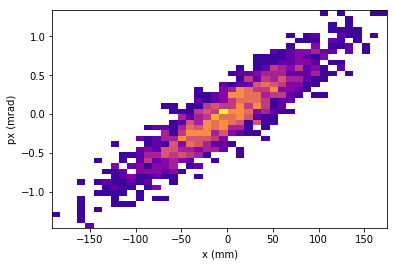

In [8]:
mycmap = plt.get_cmap('plasma') # viridis plasma inferno magma and _r versions
mycmap.set_under(color='white') # map 0 to this color
myvmin = 1e-9 # something tiny
# Bin particles
plt.hist2d(1000*xdata, ydata, bins=2*[40], cmap=mycmap, vmin=myvmin)
plt.xlabel('x (mm)')
plt.ylabel('px (mrad)')
plt.show()

# Plot in Bokeh

In [9]:
import numpy as np
from bokeh.plotting import figure, show, output_notebook
from bokeh import palettes, colors
from bokeh.models import ColumnDataSource, HoverTool
output_notebook(verbose=False, hide_banner=True)

pal = palettes.Viridis[256]
white=colors.named.white
pal[0] = white # replace 0 with white

In [10]:
xdata = 1000*zdat
ydata = 1000*pzdat

In [11]:
H, xedges, yedges = np.histogram2d(xdata, ydata,  bins=100)
xmin, xmax = min(xedges), max(xedges)
ymin, ymax = min(yedges), max(yedges)

In [12]:
ds = ColumnDataSource(data=dict(image=[H.transpose()]))   
p = figure(x_range=[xmin, xmax], y_range=[ymin, ymax], title='Bunch at end', 
           x_axis_label='z (mm)', y_axis_label='pz (1e-3)',
           plot_width=500, plot_height=500)
p.image(image='image', source=ds, 
    x=xmin, y=ymin, dw=xmax-xmin, dh=ymax-ymin, palette=pal)
show(p)